In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
!pip install -q plotnine 

     |████████████████████████████████| 3.6MB 2.8MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 81kB 23.7MB/s 


In [0]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
%matplotlib inline

In [0]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/merged_churn.csv', sep='|')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


userId  date_trunc  num_recharge_trx  ...  super  userLevel  pinEnabled
0       1  2019-01-01                12  ...   True        3.0        True
1  361243  2019-01-01                 3  ...  False        2.0        True
2  361249  2019-01-01                 7  ...  False        3.0        True
3  361255  2019-01-01                15  ...  False        2.0        True
4  361264  2019-01-01                84  ...  False        2.0        True

[5 rows x 27 columns]

In [0]:
#Load Commonly Used Variables
total_rows = df.shape[0]
total_cols = df.shape[1]
total_rows


1902947

In [0]:
total_cols

27

In [0]:
#Handling NaN and Null Values
df = df.dropna()

# Preliminary Analysis

In [0]:
#Data Shape
print("Shape of Data :")
print(df.shape)
print()

#Columns in data
print("Columns : ")
column_list = ""
for columns in df.columns :
    column_list = column_list + columns + ' | '
print(column_list)
print()

#Data types
print(df.info())
print()

#Data Description
df.describe()


Shape of Data :
(1902909, 27)

Columns : 
userId | date_trunc | num_recharge_trx | average_recharge_trx | max_recharge_trx | min_recharge_trx | num_topup_trx | average_topup_trx | max_topup_trx | min_topup_trx | num_transfer_trx | average_transfer_trx | max_transfer_trx | min_transfer_trx | num_transaction | total_transaction | date | isChurned | isActive | isVerifiedPhone | isVerifiedEmail | isUpgradedUser | blocked | premium | super | userLevel | pinEnabled | 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902909 entries, 0 to 1902946
Data columns (total 27 columns):
userId                  int64
date_trunc              object
num_recharge_trx        int64
average_recharge_trx    float64
max_recharge_trx        float64
min_recharge_trx        float64
num_topup_trx           int64
average_topup_trx       float64
max_topup_trx           float64
min_topup_trx           float64
num_transfer_trx        int64
average_transfer_trx    float64
max_transfer_trx        float64
min_transfer

userId  num_recharge_trx  ...       blocked     userLevel
count  1.902909e+06      1.902909e+06  ...  1.902909e+06  1.902909e+06
mean   8.310308e+05      3.022644e+01  ...  7.220524e-03  1.330313e+00
std    3.347891e+05      8.657340e+01  ...  8.466636e-02  4.860368e-01
min    1.000000e+00      0.000000e+00  ...  0.000000e+00  1.000000e+00
25%    5.343750e+05      0.000000e+00  ...  0.000000e+00  1.000000e+00
50%    7.738130e+05      3.000000e+00  ...  0.000000e+00  1.000000e+00
75%    1.100360e+06      2.700000e+01  ...  0.000000e+00  2.000000e+00
max    1.558467e+06      1.738900e+04  ...  1.000000e+00  3.000000e+00

[8 rows x 22 columns]

In [0]:
df.loc[df["total_transaction"]>4.018193e+09	]

userId  date_trunc  num_recharge_trx  ...  super  userLevel  pinEnabled
468624  944716  2018-10-01                20  ...  False        1.0        True

[1 rows x 27 columns]

In [0]:
df.loc[df["num_transaction"]>17000]

userId  date_trunc  num_recharge_trx  ...  super  userLevel  pinEnabled
95354  1457633  2019-01-01             17389  ...  False        1.0        True

[1 rows x 27 columns]

## Potential Outliers
    num_recharge_trx
    num_topup_trx
    num_transfer_trx
    num_transaction    

In [0]:
outlier_test = ["num_recharge_trx","num_topup_trx","num_transfer_trx","num_transaction"]

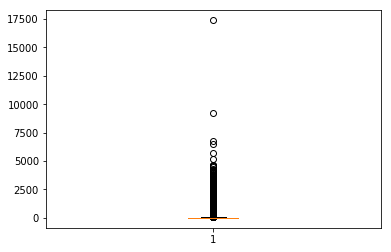

In [0]:
#Number recharge transaction outliers
plt.boxplot(df['num_recharge_trx']);

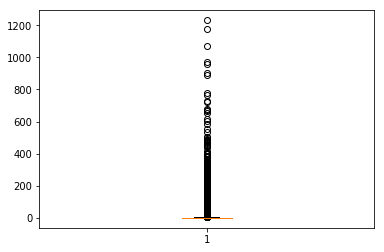

In [0]:
#Number of Topup Transaction outliers
plt.boxplot(df['num_topup_trx']);

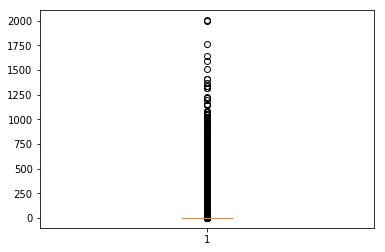

In [0]:
plt.boxplot(df['num_transfer_trx']);

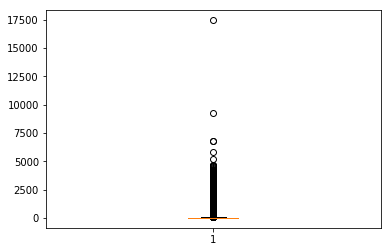

In [0]:
plt.boxplot(df['num_transaction']);

In [0]:
#Calculate Z-Score
from scipy import stats

for column in outlier_test :
    print("Z Score for %s" % (column) )
    num_recharge_values = df[column].values
    z1 = np.abs(stats.zscore(num_recharge_values))
    thresh = 3
    print(np.where(z1>thresh))
    print(len(np.where(z1>thresh)[0]))
    print("\n")


Z Score for num_recharge_trx
(array([     51,      92,     134, ..., 1900067, 1900104, 1901672]),)
27746


Z Score for num_topup_trx
(array([     75,      90,      92, ..., 1901371, 1901532, 1902135]),)
21393


Z Score for num_transfer_trx
(array([     71,     197,     212, ..., 1597859, 1599998, 1606208]),)
11095


Z Score for num_transaction
(array([     51,      92,     134, ..., 1900067, 1900104, 1901672]),)
28485




In [0]:
#Interquartile Range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

userId                   565985.00
num_recharge_trx             27.00
average_recharge_trx      22948.00
max_recharge_trx          97453.00
min_recharge_trx           5600.00
num_topup_trx                 2.00
average_topup_trx        212676.25
max_topup_trx            250425.00
min_topup_trx            103300.00
num_transfer_trx              0.00
average_transfer_trx          0.00
max_transfer_trx              0.00
min_transfer_trx              0.00
num_transaction              31.00
total_transaction       1282224.00
isChurned                     1.00
isActive                      0.00
isVerifiedPhone               0.00
isVerifiedEmail               0.00
isUpgradedUser                0.00
blocked                       0.00
userLevel                     1.00
dtype: float64


## Users with 0 transactions

In [0]:
print("People who churned this month (number of transaction = 0) : ")
print(df["userId"].loc[df['num_transaction'] == 0].count())
print("People who churned this month but DID NOT CHURN next month : ")
print(df["userId"].loc[(df['num_transaction'] == 0) & (df["isChurned"]== 0)].count())
print("People who churned this month AND CHURN next month : ")
print(df["userId"].loc[(df['num_transaction'] == 0) & (df["isChurned"]== 1)].count())

print(750757/1902909*100)

People who churned this month (number of transaction = 0) : 
750757
People who churned this month but DID NOT CHURN next month : 
37790
People who churned this month AND CHURN next month : 
712967
39.453121510277164


In [0]:
df_without_zero_transaction = df[df['num_transaction'] != 0]
df_without_zero_transaction.head()

userId  date_trunc  num_recharge_trx  ...  super  userLevel  pinEnabled
0       1  2019-01-01                12  ...   True        3.0        True
1  361243  2019-01-01                 3  ...  False        2.0        True
2  361249  2019-01-01                 7  ...  False        3.0        True
3  361255  2019-01-01                15  ...  False        2.0        True
4  361264  2019-01-01                84  ...  False        2.0        True

[5 rows x 27 columns]

In [0]:
df_without_zero_transaction.shape

(1152152, 27)

In [0]:
df_without_zero_transaction.columns

Index(['userId', 'date_trunc', 'num_recharge_trx', 'average_recharge_trx',
       'max_recharge_trx', 'min_recharge_trx', 'num_topup_trx',
       'average_topup_trx', 'max_topup_trx', 'min_topup_trx',
       'num_transfer_trx', 'average_transfer_trx', 'max_transfer_trx',
       'min_transfer_trx', 'num_transaction', 'total_transaction', 'date',
       'isChurned', 'isActive', 'isVerifiedPhone', 'isVerifiedEmail',
       'isUpgradedUser', 'blocked', 'premium', 'super', 'userLevel',
       'pinEnabled'],
      dtype='object')

In [0]:
from google.colab import files

df_without_zero_transaction.to_csv('churn_without_zero.csv', columns = df_without_zero_transaction.columns)
#!cp churn_without_zero.csv /content/gdrive/
files.download('churn_without_zero.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47686, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# Features Analysis

In [0]:
#Create Numerical Data Set

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(1902909, 22)

In [0]:
df_num_corr = df_num.drop('isChurned', axis = 1)
df_num_corr.shape

(1902909, 21)

In [0]:
df_num_corr = df_num.corr()['isChurned']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
print("There are {} strongly correlated values with isChurned:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with isChurned:
isChurned    1.00000
userLevel   -0.43256
Name: isChurned, dtype: float64


In [0]:
#Save churned values for plotting
y = df.isChurned
to_drop = ['userId','isChurned']
df_dropped = df.drop(to_drop,axis=1)

Number of Churned:  1012869
Number of Not Churned :  890040


1    0.532274
0    0.467726
Name: isChurned, dtype: float64

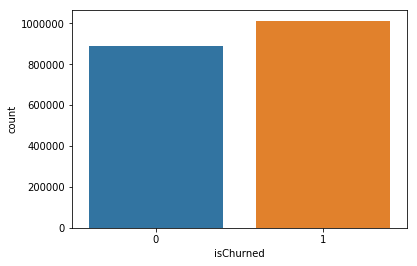

In [0]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
C, N = y.value_counts()
print('Number of Churned: ',C)
print('Number of Not Churned : ',N) 
df.isChurned.value_counts(normalize=True)

In [0]:
df.columns

Index(['userId', 'date_trunc', 'num_recharge_trx', 'average_recharge_trx',
       'max_recharge_trx', 'min_recharge_trx', 'num_topup_trx',
       'average_topup_trx', 'max_topup_trx', 'min_topup_trx',
       'num_transfer_trx', 'average_transfer_trx', 'max_transfer_trx',
       'min_transfer_trx', 'num_transaction', 'total_transaction', 'date',
       'isChurned', 'isActive', 'isVerifiedPhone', 'isVerifiedEmail',
       'isUpgradedUser', 'blocked', 'premium', 'super', 'userLevel',
       'pinEnabled'],
      dtype='object')

In [0]:
dfX = df.drop(columns=['isChurned','userId', 'date_trunc','date', 'pinEnabled'])
dfy = df.iloc[:,17]

In [0]:
dfX.head()

num_recharge_trx  average_recharge_trx  ...  super  userLevel
0                12          17787.500000  ...   True        3.0
1                 3         105350.000000  ...  False        2.0
2                 7         135132.714286  ...  False        3.0
3                15          57833.333333  ...  False        2.0
4                84          35905.654762  ...  False        2.0

[5 rows x 22 columns]

In [0]:
dfy.head()

0    1
1    1
2    1
3    1
4    1
Name: isChurned, dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.05853983e-01 7.12093948e-02 1.02363134e-01 6.90428296e-02
 7.46323032e-02 7.56131150e-02 5.82041735e-02 8.60630243e-02
 3.92304640e-03 5.45688605e-03 8.23626749e-03 4.83217414e-03
 5.94215385e-02 7.15264055e-02 2.25529389e-05 1.25500647e-03
 9.01242481e-03 0.00000000e+00 1.19109489e-03 7.50332851e-02
 2.26635461e-04 1.16880725e-01]


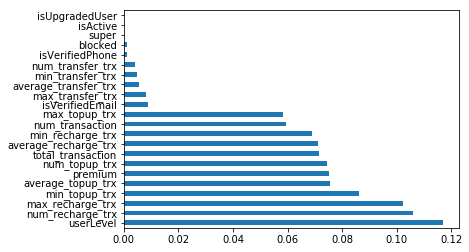

In [0]:
X = dfX.iloc[:,:]  #independent columns
y = dfy    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print 10 best features


                   Specs         Score
13     total_transaction  4.070545e+12
6          max_topup_trx  2.885679e+11
5      average_topup_trx  1.803427e+11
7          min_topup_trx  1.059657e+11
10      max_transfer_trx  9.519495e+10
2       max_recharge_trx  6.591777e+10
9   average_transfer_trx  3.000455e+10
1   average_recharge_trx  1.029849e+10
11      min_transfer_trx  8.095707e+09
3       min_recharge_trx  1.737004e+09
12       num_transaction  3.740326e+07
0       num_recharge_trx  3.313783e+07
4          num_topup_trx  2.601728e+06
8       num_transfer_trx  1.062365e+06
19               premium  2.189774e+05
21             userLevel  6.322580e+04
16       isVerifiedEmail  2.865058e+04
18               blocked  1.909225e+03
20                 super  1.777623e+03
15       isVerifiedPhone  5.046739e+01
14              isActive  1.553486e-03


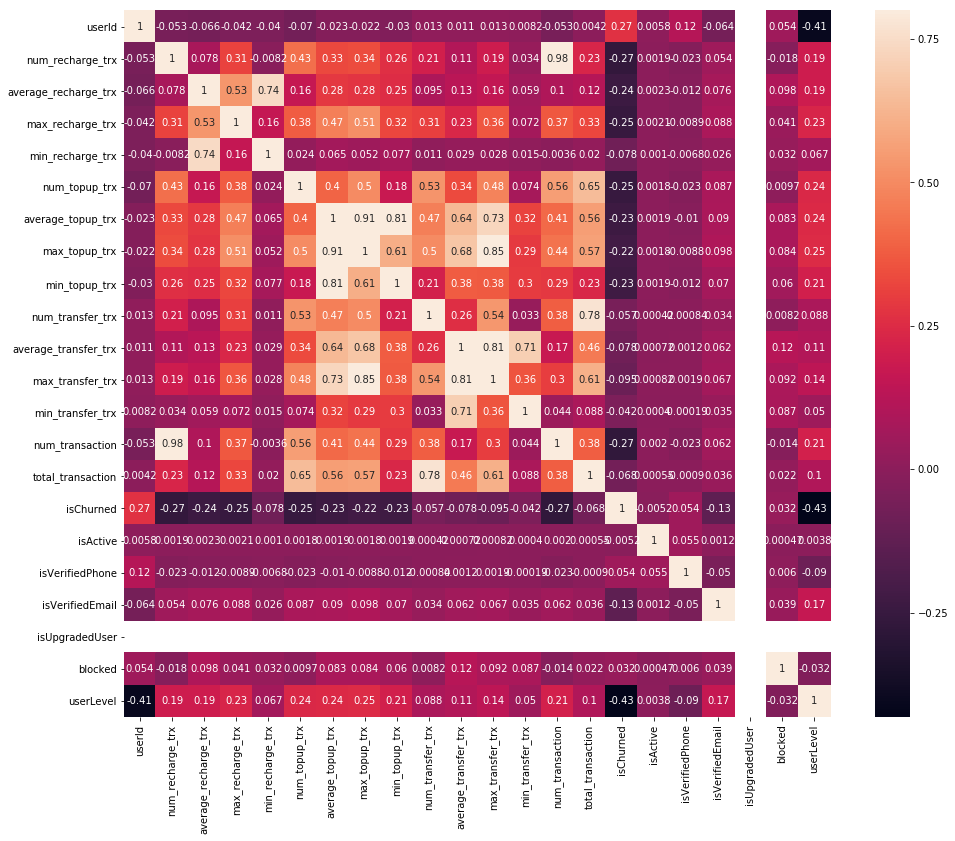

In [0]:
#Find correlated Features using heatmap
corrmat = df.corr() #df = this step, data= next step
fig = plt.figure(figsize = (16, 13))

sns.heatmap(corrmat, vmax = .8,annot=True, square = True)
plt.show()

# **Backward Feature Selection**

## TO DO : Try Dropping Correlated Features

# Working With Fixed Data

In [0]:
def importData(path, drop):
    data = pd.read_csv(path, sep = '|')
    print("Banyaknya baris dan kolom", data.shape)
    print("Banyaknya data duplicate", data.duplicated().sum())
    data = data.drop_duplicates()
#     data = data[data.num_transaction != 0]
    data = data.drop(drop,axis=1)
    print("Banyaknya data setelah di drop", data.shape)
    print(data.head())
    return data

In [0]:
drop = ['userId', 'isUpgradedUser', 'date_trunc', 'date',"isActive","isVerifiedPhone","isVerifiedEmail","blocked","premium","super","pinEnabled"]
data = importData('gdrive/My Drive/merged_churn.csv',drop)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Banyaknya baris dan kolom (1902947, 27)
Banyaknya data duplicate 0
Banyaknya data setelah di drop (1902947, 16)
   num_recharge_trx  average_recharge_trx  ...  isChurned  userLevel
0                12          17787.500000  ...          1        3.0
1                 3         105350.000000  ...          1        2.0
2                 7         135132.714286  ...          1        3.0
3                15          57833.333333  ...          1        2.0
4                84          35905.654762  ...          1        2.0

[5 rows x 16 columns]


In [0]:
data = data.dropna()
data.isChurned.value_counts(normalize=True)

1    0.532274
0    0.467726
Name: isChurned, dtype: float64

In [0]:
#Function to Extract Input and Output
def extractInputOutput(data, output):
    y = data[output]
    x = data.drop(output, axis=1)
    print(x.columns) #optional
    print(y.head()) #optional
    return x,y

In [0]:
x,y = extractInputOutput(data, 'isChurned');

Index(['num_recharge_trx', 'average_recharge_trx', 'max_recharge_trx',
       'min_recharge_trx', 'num_topup_trx', 'average_topup_trx',
       'max_topup_trx', 'min_topup_trx', 'num_transfer_trx',
       'average_transfer_trx', 'max_transfer_trx', 'min_transfer_trx',
       'num_transaction', 'total_transaction', 'userLevel'],
      dtype='object')
0    1
1    1
2    1
3    1
4    1
Name: isChurned, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def train_test_data(x,y): 
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.4,
                                                        random_state =100)
   # print(x_train.head(), y_train.head()) #
    #print(x_test.head(), y_test.head()) #
    return x_train, x_test, y_train, y_test

In [0]:
x_train, x_test, y_train, y_test = train_test_data(x,y)

In [0]:
#Make sure data is balanced
y_train.value_counts(normalize=True)

1    0.532552
0    0.467448
Name: isChurned, dtype: float64

In [0]:
x_train.isnull().sum()

num_recharge_trx        0
average_recharge_trx    0
max_recharge_trx        0
min_recharge_trx        0
num_topup_trx           0
average_topup_trx       0
max_topup_trx           0
min_topup_trx           0
num_transfer_trx        0
average_transfer_trx    0
max_transfer_trx        0
min_transfer_trx        0
num_transaction         0
total_transaction       0
userLevel               0
dtype: int64

In [0]:
#x_train = x_train.drop(["isActive","isVerifiedPhone","isVerifiedEmail","blocked","premium","super","pinEnabled"], axis = 1)
#x_test = x_test.drop(["isActive","isVerifiedPhone","isVerifiedEmail","blocked","premium","super","pinEnabled"], axis = 1) 

In [0]:
len(x_train.columns)

15

In [0]:
len(x_test.columns)

15

In [0]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

## Pre-Process Categorical Data

In [0]:
def categoricalDummies(data):
    data = data.fillna("KOSONG")
    dummy_variables = pd.DataFrame([])
    label_encoder = pd.Series([])
    label_binarizer = pd.Series([])
    
    for i in list(data):
        label_en = LabelEncoder()
        label_bin = LabelBinarizer()
        
        encoded = label_en.fit_transform(data[i])
        binary = label_bin.fit_transform(encoded)
        
        if binary.shape[1] == 1:
            dummy = pd.DataFrame(binary, columns = [i], index = data.index)
        else:
            dummy = pd.DataFrame(binary, columns=["{}_{}".format(a, b) for b in sorted(data[i].unique())
                                              for a in [i]], 
                             index = data.index)
        
        dummy_variables = pd.concat([dummy_variables, dummy], axis = 1)
        label_encoder[i] = label_en
        label_binarizer[i] = label_bin
        
    return dummy_variables, label_encoder, label_binarizer, dummy_variables.columns

## Encode Categorical data using labelencoder (UserLevel)

In [0]:
def encode(data, column) :
#test = x_test['userLevel']
    dummy_variables = pd.DataFrame([])
    label_encoder = pd.Series([])
    label_binarizer = pd.Series([])

    label_en = LabelEncoder()
    label_bin = LabelBinarizer()

    i='userLevel'

    encoded = label_en.fit_transform(data[column])
    binary = label_bin.fit_transform(encoded)
    if binary.shape[1] == 1:
        dummy = pd.DataFrame(binary, columns = [i], index = data.index)
    else:
        dummy = pd.DataFrame(binary, columns=["{}_{}".format(a, b) for b in sorted(data[column].unique())
                                          for a in [i]], 
                         index = data.index)

    dummy_variables = pd.concat([dummy_variables, dummy], axis = 1)
    label_encoder[i] = label_en
    label_binarizer[i] = label_bin
    
    return dummy_variables, label_encoder, label_binarizer, dummy_variables


In [0]:
data_train_dummy,label_encoder, label_binarizer, dummy_columns = encode(x_train,'userLevel')
data_test_dummy,label_encoder, label_binarizer, dummy_columns = encode(x_test,'userLevel')

In [0]:
data_train_dummy.isnull().any().any()

False

## Standardizing Numerical Input

In [0]:
from sklearn.preprocessing import Imputer
def fitImputNum(data,column_numeric, missing_values, method):
    imput = Imputer(missing_values=missing_values, strategy = method)
    imput.fit(data[column_numeric])
    return data[column_numeric], imput

In [0]:
numeric_columns = x_train.columns[:-1]

In [0]:
x_train.isna().sum().sum()

0

In [0]:
x_train_numeric, imput = fitImputNum(x_train, numeric_columns, 'NaN', 'median')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
x_train_numeric.head()

num_recharge_trx  ...  total_transaction
1616259                 0  ...                0.0
1779899                49  ...          1725629.0
1807069                 0  ...                0.0
1385813                 9  ...           199572.0
1082614                50  ...          3005929.0

[5 rows x 14 columns]

In [0]:
def transformImput(data, imputer):
    data_numeric = pd.DataFrame(imputer.transform(data))
    data_numeric.columns = data.columns
    data_numeric.index = data.index
    print(data_numeric.isnull().sum())
    print(data_numeric.head())
    return data_numeric

In [0]:
x_train_imput_num = transformImput(x_train_numeric, imputer =imput);

num_recharge_trx        0
average_recharge_trx    0
max_recharge_trx        0
min_recharge_trx        0
num_topup_trx           0
average_topup_trx       0
max_topup_trx           0
min_topup_trx           0
num_transfer_trx        0
average_transfer_trx    0
max_transfer_trx        0
min_transfer_trx        0
num_transaction         0
total_transaction       0
dtype: int64
         num_recharge_trx  ...  total_transaction
1616259               0.0  ...                0.0
1779899              49.0  ...          1725629.0
1807069               0.0  ...                0.0
1385813               9.0  ...           199572.0
1082614              50.0  ...          3005929.0

[5 rows x 14 columns]


In [0]:
from sklearn.preprocessing import StandardScaler
def fitStandardize(data):
    '''
    Notes:
    Untuk menghindari perubahan skala pada dummy variables, 
    lebih baik tidak menggunakan standardisasi pada dummy variables
    '''
    standard = StandardScaler()
    standard.fit(data)
    return standard

In [0]:
def transformStandardize(data, standard):
    data_standard = pd.DataFrame(standard.transform(data))
    data_standard.columns = data.columns
    data_standard.index = data.index
    print(data_standard.head())
    return data_standard

In [0]:
standard = fitStandardize(x_train_imput_num)
x_train_num_standardize = transformStandardize(x_train_imput_num, standard=standard)

         num_recharge_trx  ...  total_transaction
1616259         -0.345438  ...          -0.099965
1779899          0.214734  ...          -0.062197
1807069         -0.345438  ...          -0.099965
1385813         -0.242550  ...          -0.095597
1082614          0.226166  ...          -0.034175

[5 rows x 14 columns]


In [0]:
standard = fitStandardize(x_test)
x_test_standardize = transformStandardize(x_test, standard=standard)

         num_recharge_trx  average_recharge_trx  ...  total_transaction  userLevel
783837          -0.354919             -0.417377  ...          -0.099664  -0.680134
1024788         -0.190611              0.075554  ...          -0.083448   1.378063
1312248          1.382051              0.215864  ...           0.106967   1.378063
506279           4.891201              0.094105  ...           0.309526  -0.680134
153955          -0.354919             -0.417377  ...          -0.099664  -0.680134

[5 rows x 15 columns]


## Menggabungkan Standardized Input dengn dummy variables

In [0]:
x_train_concat = pd.concat([x_train_num_standardize, data_train_dummy], axis = 1)

In [0]:
x_test_concat = pd.concat([x_test_standardize, data_test_dummy], axis = 1)

In [0]:
x_test_concat = x_test_concat.drop('userLevel', axis=1)

In [0]:
x_test_concat.isnull().any().any()

False

In [0]:
x_test_concat = x_test_concat.dropna()

In [0]:
x_test_concat.head()

num_recharge_trx  average_recharge_trx  ...  userLevel_2.0  userLevel_3.0
783837          -0.354919             -0.417377  ...              0              0
1024788         -0.190611              0.075554  ...              1              0
1312248          1.382051              0.215864  ...              1              0
506279           4.891201              0.094105  ...              0              0
153955          -0.354919             -0.417377  ...              0              0

[5 rows x 17 columns]

In [0]:
x_train_standardize = x_train_num_standardize

# Training Machine Learning

## Logistic Regression

In [0]:
#test accuracy of test prediction
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV


In [0]:
def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001],
                 'penalty': ['l1', 'l2']}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 3,
                                    n_iter = 2, n_jobs=2, random_state = 123, verbose=4)
    
    random_logreg.fit(x_train_concat, y_train)
    
    print ("Best Accuracy", random_logreg.score(x_train, y_train))
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

In [0]:
model = LogisticRegression().fit(x_train_concat, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
model.score(x_train_concat, y_train)

0.7881989514305283

In [0]:
def scoring(model) :
    y_predict = model.predict(x_train_concat)
    print("Model Score based on training data")
    print(accuracy_score(y_train, y_predict))
    y_predict = model.predict(x_test_concat)
    print("Model Score based on test data")
    print(accuracy_score(y_test, y_predict))

In [0]:
scoring(model)

Model Score based on training data
0.7881989514305283
Model Score based on test data
0.7888355350022662


### CV Score

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier()

In [0]:
tree_model = tree.fit(x_train_concat,y_train)

In [0]:
scoring(tree_model)

Model Score based on training data
0.9675129144310556
Model Score based on test data
0.785011134248159


## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [0]:
def rf_fit(x_train, y_train):
     rf = RandomForestClassifier()

     hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                         0.001, 0.00033, 0.0001],
                  'penalty': ['l1', 'l2']}

     random_rf = RandomizedSearchCV(rf, param_distributions = hyperparam, cv = 3,
                                     n_iter = 2, n_jobs=2, random_state = 123)
    
     random_rf.fit(x_train, y_train)
    
     print ("Best Accuracy", random_logreg.score(x_train, y_train))
     print ("Best Param", random_logreg.best_params_)
    
     return random_logreg

In [0]:

rf_model = RandomForestClassifier(n_estimators=500, max_features=0.7).fit(x_train_concat,y_train)

#scoring model without hyperparam tuning
scoring(rf_model)

KeyboardInterrupt: ignored

In [0]:
scoring(rf_model)

### CV Score

## XGB Classifier

In [0]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:logistic", random_state=42)


In [0]:
xgb_model.fit(x_train_concat, y_train)


In [0]:
#Fungsi buat ubah hasil jadi 0 atau 1 berdasarkan threshold
def classifier(threshold, data) :
  #Array buat nyimpen hasil prediksi
  predict = []

  for result in data :
    if result > threshold :
      predict.append(1)
    else :
      predict.append(0)  
   
  return predict


In [0]:
#print(xgb_model.predict(x_train_concat))      
xgb_result = xgb_model.predict(x_train_concat)

In [0]:
threshold = 0.5

In [0]:
xgb_prediction = classifier(threshold,xgb_result)

In [0]:
print("Model Score based on training data")
print(accuracy_score(y_train, xgb_prediction))
xgb_test_prediction = classifier(threshold,xgb_model.predict(x_test_concat))
print("Model Score based on test data")
print(accuracy_score(y_test, xgb_test_prediction))

## KNN Classifier

## SVM Classifier

# New Section